<a href="https://colab.research.google.com/github/rijakhatiwada/Worksheet/blob/main/RijaKhatiwada_2438437ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Data cleaning and  summary statistics

In [ ]:
# Load dataset
file_path = "/content/drive/MyDrive/Students_prediction.csv"
df = pd.read_csv(file_path)

# Display basic dataset info
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop duplicate rows if any
df = df.drop_duplicates()

# Compute summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Display unique values in target column
print("\nTarget Variable Distribution:")
print(df["Target"].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation        

Data Visualizations and Charts

<ipython-input-6-540fdf07bbb4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Target"], palette="coolwarm")


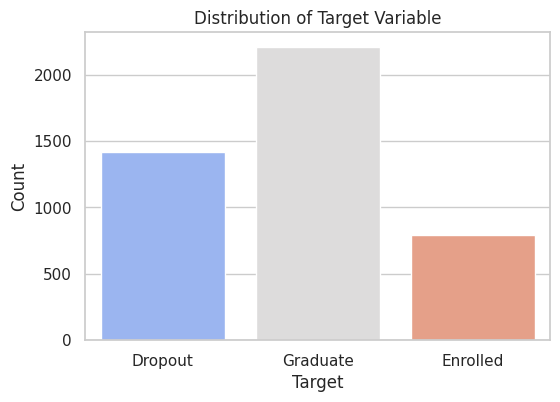

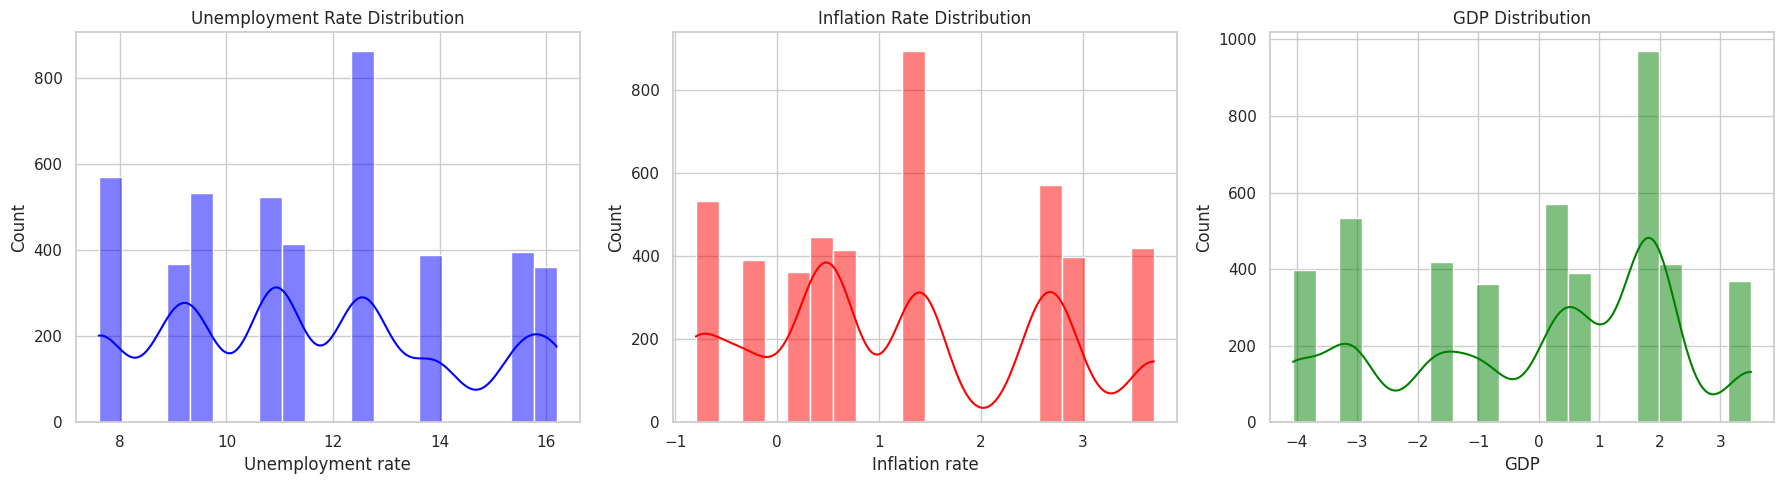

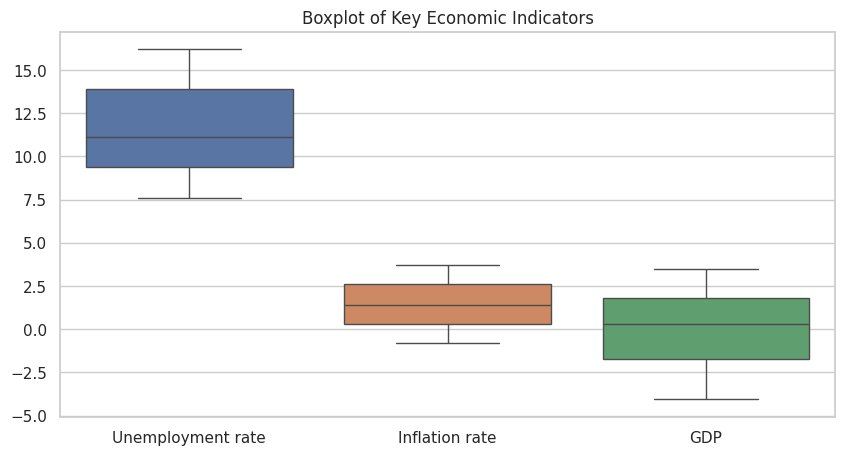

In [ ]:
# Set style
sns.set(style="whitegrid")

# Plot target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Target"], palette="coolwarm")
plt.title("Distribution of Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# Visualizing numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Unemployment Rate Distribution
sns.histplot(df["Unemployment rate"], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Unemployment Rate Distribution")

# Inflation Rate Distribution
sns.histplot(df["Inflation rate"], bins=20, kde=True, ax=axes[1], color="red")
axes[1].set_title("Inflation Rate Distribution")

# GDP Distribution
sns.histplot(df["GDP"], bins=20, kde=True, ax=axes[2], color="green")
axes[2].set_title("GDP Distribution")

plt.tight_layout()
plt.show()

# Boxplot for outlier detection
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["Unemployment rate", "Inflation rate", "GDP"]])
plt.title("Boxplot of Key Economic Indicators")
plt.show()


Build a model from scratch

In [ ]:
import math
import random
import csv

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

def softmax(z):
    max_z = max(z)  # Stability trick
    exp_z = [math.exp(i - max_z) for i in z]
    sum_exp = sum(exp_z)
    return [i / sum_exp for i in exp_z]

def cross_entropy(y_true, y_pred):
    return -sum(y_true[i] * math.log(y_pred[i] + 1e-9) for i in range(len(y_true)))

def initialize_parameters(n_features, n_classes):
    limit = 1 / math.sqrt(n_features)
    weights = [[random.uniform(-limit, limit) for _ in range(n_features)] for _ in range(n_classes)]
    bias = [0] * n_classes
    return weights, bias

def normalize_features(X):
    min_vals = [min(col) for col in zip(*X)]
    max_vals = [max(col) for col in zip(*X)]
    return [[(X[i][j] - min_vals[j]) / (max_vals[j] - min_vals[j] + 1e-9) for j in range(len(X[i]))] for i in range(len(X))]

def forward_propagation(X, weights, bias):
    logits = [sum(X[j] * weights[i][j] for j in range(len(X))) + bias[i] for i in range(len(weights))]
    return softmax(logits)

def compute_gradients(X, y_true, y_pred, weights, reg_lambda):
    n_classes = len(weights)
    n_features = len(X)
    gradients_w = [[0] * n_features for _ in range(n_classes)]
    gradients_b = [0] * n_classes

    for i in range(n_classes):
        error = y_pred[i] - y_true[i]
        for j in range(n_features):
            gradients_w[i][j] += error * X[j] + reg_lambda * weights[i][j]  # L2 Regularization
        gradients_b[i] += error

    return gradients_w, gradients_b

def update_parameters(weights, bias, gradients_w, gradients_b, learning_rate):
    for i in range(len(weights)):
        for j in range(len(weights[i])):
            weights[i][j] -= learning_rate * gradients_w[i][j]
        bias[i] -= learning_rate * gradients_b[i]
    return weights, bias

def load_dataset(filename):
    X, y = [], []
    label_mapping = {"Graduate": [1, 0, 0], "Dropout": [0, 1, 0], "Enrolled": [0, 0, 1]}

    with open(filename, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)

        for row in reader:
            X.append([float(value) for value in row[:-1]])
            y.append(label_mapping[row[-1]])

    return normalize_features(X), y  # Normalizing features for better performance

def train(X_train, y_train, n_classes, learning_rate=0.01, epochs=2000, reg_lambda=0.0005):
    n_features = len(X_train[0])
    weights, bias = initialize_parameters(n_features, n_classes)

    for epoch in range(epochs):
        total_loss = 0
        if epoch % 500 == 0:
            learning_rate *= 0.9  # Learning rate decay
        for X, y in zip(X_train, y_train):
            y_pred = forward_propagation(X, weights, bias)
            total_loss += cross_entropy(y, y_pred)
            gradients_w, gradients_b = compute_gradients(X, y, y_pred, weights, reg_lambda)
            weights, bias = update_parameters(weights, bias, gradients_w, gradients_b, learning_rate)

    return weights, bias

def predict(X_test, weights, bias):
    predictions = [forward_propagation(X, weights, bias) for X in X_test]
    return [p.index(max(p)) for p in predictions]

def accuracy(y_true, y_pred):
    correct = sum(1 for yt, yp in zip(y_true, y_pred) if yt.index(1) == yp)
    return (correct / len(y_true)) * 100

def precision_recall_f1(y_true, y_pred, n_classes=3):
    precision, recall, f1 = [], [], []
    for c in range(n_classes):
        tp = sum(1 for yt, yp in zip(y_true, y_pred) if yt.index(1) == yp == c)
        fp = sum(1 for yt, yp in zip(y_true, y_pred) if yt.index(1) != c and yp == c)
        fn = sum(1 for yt, yp in zip(y_true, y_pred) if yt.index(1) == c and yp != c)

        prec = tp / (tp + fp + 1e-9)
        rec = tp / (tp + fn + 1e-9)
        f1_score = 2 * (prec * rec) / (prec + rec + 1e-9)

        precision.append(prec)
        recall.append(rec)
        f1.append(f1_score)

    return precision, recall, f1

if __name__ == "__main__":
    filename = "/content/drive/MyDrive/Students_prediction.csv"
    X, y = load_dataset(filename)

    split_idx = int(0.7 * len(X))  # 70/30 train-test split for generalization
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    weights, bias = train(X_train, y_train, n_classes=3)

    y_train_pred = predict(X_train, weights, bias)
    train_acc = accuracy(y_train, y_train_pred)
    print(f"Training Accuracy: {train_acc:.2f}%")

    y_test_pred = predict(X_test, weights, bias)
    test_acc = accuracy(y_test, y_test_pred)
    print(f"Test Accuracy: {test_acc:.2f}%")

    precision, recall, f1 = precision_recall_f1(y_test, y_test_pred, n_classes=3)
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")












Training Accuracy: 77.03%
Test Accuracy: 75.68%
Precision: [0.7597911227144128, 0.815315315313479, 0.5169491525379919]
Recall: [0.9311999999985101, 0.7784946236542398, 0.2563025210073265]
F1 Score: [0.8368080512652573, 0.7964796474633108, 0.3426966287683689]


Build a Primary model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Students_prediction.csv")

# Encode target variable
df['Target'] = df['Target'].map({"Graduate": 1, "Dropout": 0, "Enrolled": 0})  # Binary classification

# Splitting features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred) * 100  # Convert to percentage
    precision = precision_score(y_true, y_pred) * 100
    recall = recall_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred) * 100
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Score: {f1:.2f}%\n")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("\n" + "-"*50 + "\n")

# Evaluate both models
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Determine the best model
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
rf_acc = accuracy_score(y_test, y_pred_rf)

best_model = "Logistic Regression" if log_reg_acc > rf_acc else "Random Forest"
print(f"The best-performing model is: {best_model}")


Logistic Regression Evaluation:
Accuracy: 84.34%
Precision: 81.00%
Recall: 88.32%
F1 Score: 84.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       686
           1       0.81      0.88      0.85       642

    accuracy                           0.84      1328
   macro avg       0.85      0.84      0.84      1328
weighted avg       0.85      0.84      0.84      1328


--------------------------------------------------

Random Forest Evaluation:
Accuracy: 84.11%
Precision: 81.28%
Recall: 87.23%
F1 Score: 84.15%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       686
           1       0.81      0.87      0.84       642

    accuracy                           0.84      1328
   macro avg       0.84      0.84      0.84      1328
weighted avg       0.84      0.84      0.84      1328


--------------------------------------------------



Hyper-parameter Optimization with Cross-Validation

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Students_prediction.csv")

# Encode target variable
df['Target'] = df['Target'].map({"Graduate": 1, "Dropout": 0, "Enrolled": 0})  # Binary classification

# Splitting features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for Logistic Regression
log_reg = LogisticRegression()
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
log_reg_cv = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
log_reg_cv.fit(X_train, y_train)
best_log_reg = log_reg_cv.best_estimator_

# Hyperparameter tuning for Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
rf_cv = GridSearchCV(rf_clf, rf_params, cv=5, scoring='accuracy')
rf_cv.fit(X_train, y_train)
best_rf = rf_cv.best_estimator_

# Evaluate best models
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred) * 100  # Convert to percentage
    precision = precision_score(y_true, y_pred) * 100
    recall = recall_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred) * 100
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Score: {f1:.2f}%\n")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("\n" + "-"*50 + "\n")

# Evaluate both models
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Determine the best model
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
rf_acc = accuracy_score(y_test, y_pred_rf)

best_model = "Logistic Regression" if log_reg_acc > rf_acc else "Random Forest"
print(f"The best-performing model is: {best_model}")

# Print best hyperparameters
print("Best hyperparameters for Logistic Regression:", log_reg_cv.best_params_)
print("Best hyperparameters for Random Forest:", rf_cv.best_params_)


Logistic Regression Evaluation:
Accuracy: 84.34%
Precision: 81.00%
Recall: 88.32%
F1 Score: 84.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       686
           1       0.81      0.88      0.85       642

    accuracy                           0.84      1328
   macro avg       0.85      0.84      0.84      1328
weighted avg       0.85      0.84      0.84      1328


--------------------------------------------------

Random Forest Evaluation:
Accuracy: 83.81%
Precision: 81.08%
Recall: 86.76%
F1 Score: 83.82%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       686
           1       0.81      0.87      0.84       642

    accuracy                           0.84      1328
   macro avg       0.84      0.84      0.84      1328
weighted avg       0.84      0.84      0.84      1328


--------------------------------------------------



Feature Selection

In [ ]:

from sklearn.feature_selection import SelectFromModel

# Feature selection using Random Forest Importance
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)
feature_importances = rf_clf.feature_importances_

# Select important features
threshold = np.mean(feature_importances)  # Use mean importance as threshold
selected_features = X.columns[feature_importances > threshold]
X = X[selected_features]

print("Selected Features:", list(selected_features))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for Logistic Regression
log_reg = LogisticRegression()
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
log_reg_cv = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
log_reg_cv.fit(X_train, y_train)
best_log_reg = log_reg_cv.best_estimator_

# Hyperparameter tuning for Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
rf_cv = GridSearchCV(rf_clf, rf_params, cv=5, scoring='accuracy')
rf_cv.fit(X_train, y_train)
best_rf = rf_cv.best_estimator_

# Evaluate best models
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred) * 100  # Convert to percentage
    precision = precision_score(y_true, y_pred) * 100
    recall = recall_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred) * 100
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Score: {f1:.2f}%\n")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("\n" + "-"*50 + "\n")

# Evaluate both models
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Determine the best model
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
rf_acc = accuracy_score(y_test, y_pred_rf)

best_model = "Logistic Regression" if log_reg_acc > rf_acc else "Random Forest"
print(f"The best-performing model is: {best_model}")

# Print best hyperparameters
print("Best hyperparameters for Logistic Regression:", log_reg_cv.best_params_)
print("Best hyperparameters for Random Forest:", rf_cv.best_params_)


Selected Features: ['Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']
Logistic Regression Evaluation:
Accuracy: 80.12%
Precision: 74.93%
Recall: 88.47%
F1 Score: 81.14%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       686
           1       0.75      0.88      0.81       642

    accuracy                           0.80      1328
   macro avg       0.81      0.80      0.80      1328
weighted avg       0.81      0.80      0.80      1328


--------------------------------------------------

Random Forest Evaluation:
Accuracy: 80.42%
Precision: 76.68%
Recall: 85.51%
F1 Score: 80.85%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       686
           1       0.77      0.86      0.81       642

    accuracy                           0.80   

Final Model

In [ ]:
# Selected features from Task 5
selected_features = ['Course', 'Tuition fees up to date', 'Age at enrollment', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']
X = X[selected_features]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optimal hyperparameters from Task 4
best_log_reg = LogisticRegression(C=1, solver='lbfgs')
best_rf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=10, random_state=42)

# Train final models
best_log_reg.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

# Evaluate final models
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred) * 100  # Convert to percentage
    precision = precision_score(y_true, y_pred) * 100
    recall = recall_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred) * 100
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Score: {f1:.2f}%\n")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("\n" + "-"*50 + "\n")

# Evaluate both models
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Determine the best model
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
rf_acc = accuracy_score(y_test, y_pred_rf)

best_model = "Logistic Regression" if log_reg_acc > rf_acc else "Random Forest"
print(f"The best-performing model is: {best_model}")


Logistic Regression Evaluation:
Accuracy: 82.15%
Precision: 79.31%
Recall: 85.36%
F1 Score: 82.22%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       686
           1       0.79      0.85      0.82       642

    accuracy                           0.82      1328
   macro avg       0.82      0.82      0.82      1328
weighted avg       0.82      0.82      0.82      1328


--------------------------------------------------

Random Forest Evaluation:
Accuracy: 82.76%
Precision: 80.68%
Recall: 84.58%
F1 Score: 82.59%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       686
           1       0.81      0.85      0.83       642

    accuracy                           0.83      1328
   macro avg       0.83      0.83      0.83      1328
weighted avg       0.83      0.83      0.83      1328


--------------------------------------------------



#Regression Task


In [ ]:

# Load the dataset
file_path = "/content/drive/MyDrive/climate_change.csv"
df = pd.read_csv(file_path)

# Display basic dataset information
print("Basic Dataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Drop duplicate rows if any
df = df.drop_duplicates()

# Compute summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Display unique values in the target column (Temperature anomaly)
print("\nUnique Temperature Anomalies:")
print(df["Temp"].unique())


Basic Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB
None

Missing Values in Each Column:
Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

Summary Statistics:
              Year       Month         MEI         CO2          CH4  \
count   308.00

Visualizations and  Charts

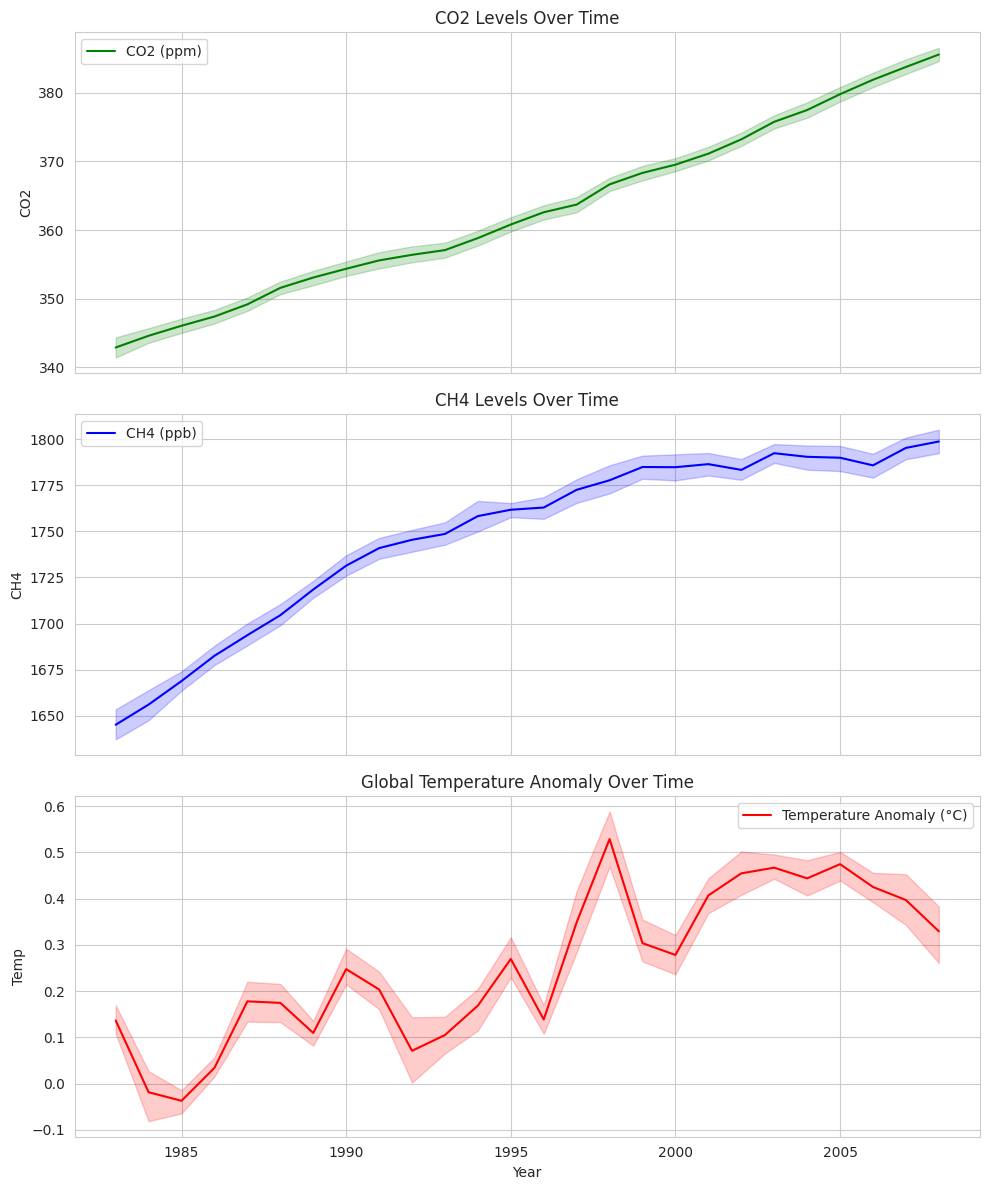

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# CO2 levels over time
sns.lineplot(x=df["Year"], y=df["CO2"], ax=axes[0], color="green", label="CO2 (ppm)")
axes[0].set_title("CO2 Levels Over Time")

# CH4 levels over time
sns.lineplot(x=df["Year"], y=df["CH4"], ax=axes[1], color="blue", label="CH4 (ppb)")
axes[1].set_title("CH4 Levels Over Time")

# Temperature anomaly over time
sns.lineplot(x=df["Year"], y=df["Temp"], ax=axes[2], color="red", label="Temperature Anomaly (°C)")
axes[2].set_title("Global Temperature Anomaly Over Time")

plt.xlabel("Year")
plt.tight_layout()
plt.show()


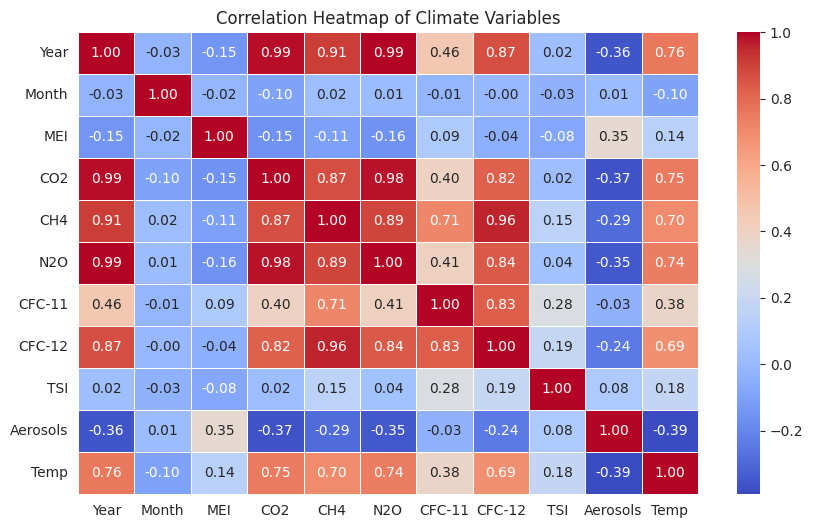

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Climate Variables")
plt.show()


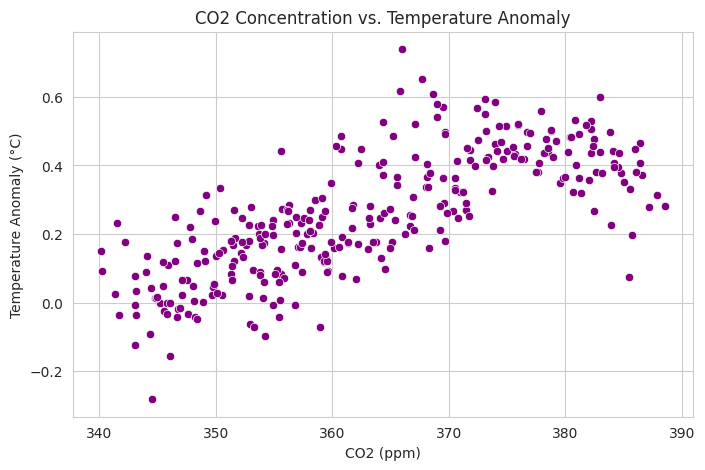

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["CO2"], y=df["Temp"], color="purple")
plt.title("CO2 Concentration vs. Temperature Anomaly")
plt.xlabel("CO2 (ppm)")
plt.ylabel("Temperature Anomaly (°C)")
plt.show()


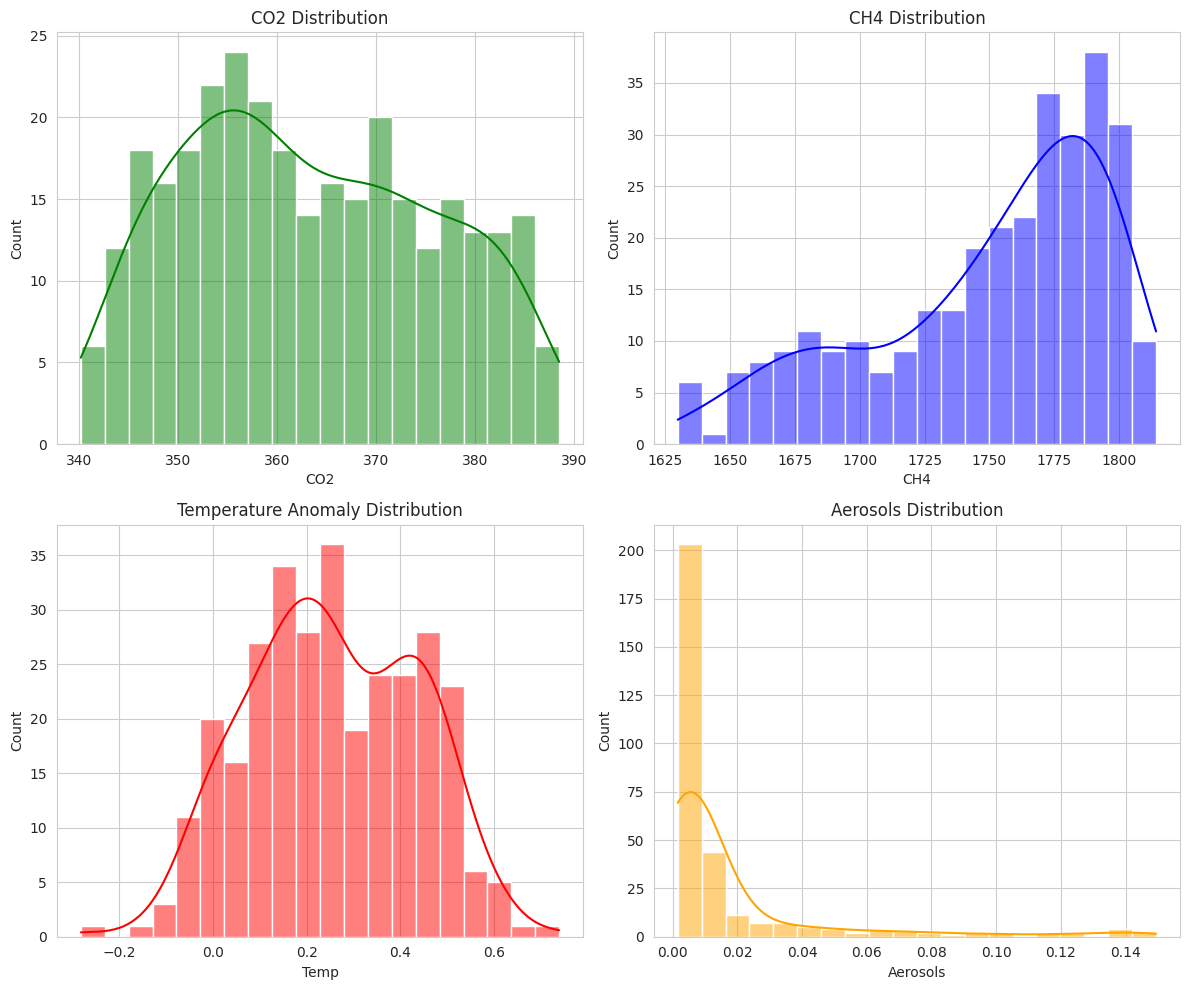

In [ ]:
# Set up figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# CO2 distribution
sns.histplot(df["CO2"], bins=20, kde=True, ax=axes[0, 0], color="green")
axes[0, 0].set_title("CO2 Distribution")

# CH4 distribution
sns.histplot(df["CH4"], bins=20, kde=True, ax=axes[0, 1], color="blue")
axes[0, 1].set_title("CH4 Distribution")

# Temperature anomaly distribution
sns.histplot(df["Temp"], bins=20, kde=True, ax=axes[1, 0], color="red")
axes[1, 0].set_title("Temperature Anomaly Distribution")

# Aerosols distribution
sns.histplot(df["Aerosols"], bins=20, kde=True, ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Aerosols Distribution")

plt.tight_layout()
plt.show()


Build a model from scratch


In [ ]:
# Load dataset manually
file_path = "/content/drive/MyDrive/climate_change.csv"
data = []
with open(file_path, "r") as file:
    lines = file.readlines()
    headers = lines[0].strip().split(",")  # Extract column names
    for line in lines[1:]:
        values = line.strip().split(",")
        data.append([float(x) for x in values])  # Convert string values to float

# Extract features and target variable (Temperature Anomaly)
feature_indices = [headers.index("CO2"), headers.index("CH4"), headers.index("N2O"),
                   headers.index("CFC-11"), headers.index("CFC-12"),
                   headers.index("TSI"), headers.index("Aerosols")]

target_index = headers.index("Temp")

X = [[row[i] for i in feature_indices] for row in data]  # Extract features
y = [row[target_index] for row in data]  # Extract target values

# Standardize features (zero mean, unit variance)
X_mean = [sum(col) / len(col) for col in zip(*X)]  # Mean of each column
X_std = [((sum((X[i][j] - X_mean[j]) ** 2 for i in range(len(X))) / len(X)) ** 0.5) for j in range(len(X[0]))]  # Std of each column

# Standardization formula: (X - mean) / std
X_standardized = [
    [(X[i][j] - X_mean[j]) / X_std[j] if X_std[j] != 0 else 0 for j in range(len(X[i]))]
    for i in range(len(X))
]

# Split into training (80%) and testing (20%) sets manually
split_index = int(0.8 * len(X_standardized))
X_train, X_test = X_standardized[:split_index], X_standardized[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Add bias term (column of ones) to X_train and X_test
X_train = [[1] + row for row in X_train]
X_test = [[1] + row for row in X_test]

# Initialize model parameters (weights)
theta = [0] * (len(feature_indices) + 1)  # Including bias term

# Hyperparameters
learning_rate = 0.01
epochs = 2000  # Increase epochs
lambda_ = 0.1  # Regularization parameter
m = len(y_train)

# Gradient Descent Algorithm with L2 regularization (Ridge)
for _ in range(epochs):
    # Calculate predictions
    predictions = [sum(theta[j] * X_train[i][j] for j in range(len(theta))) for i in range(m)]

    # Calculate errors
    errors = [predictions[i] - y_train[i] for i in range(m)]

    # Calculate gradients with regularization
    gradients = [sum(errors[i] * X_train[i][j] for i in range(m)) / m for j in range(len(theta))]

    # Add regularization term for each coefficient (except for the bias term)
    for j in range(1, len(theta)):
        gradients[j] += lambda_ * theta[j] / m

    # Update theta parameters
    theta = [theta[j] - learning_rate * gradients[j] for j in range(len(theta))]

# Model Predictions
y_train_pred = [sum(theta[j] * X_train[i][j] for j in range(len(theta))) for i in range(m)]
y_test_pred = [sum(theta[j] * X_test[i][j] for j in range(len(theta))) for i in range(len(y_test))]

# Mean Squared Error (MSE)
mse_train = sum((y_train[i] - y_train_pred[i]) ** 2 for i in range(m)) / m
mse_test = sum((y_test[i] - y_test_pred[i]) ** 2 for i in range(len(y_test))) / len(y_test)

# R-squared (R²) Score
ss_total_train = sum((y_train[i] - sum(y_train) / m) ** 2 for i in range(m))
ss_total_test = sum((y_test[i] - sum(y_test) / len(y_test)) ** 2 for i in range(len(y_test)))

r2_train = 1 - (mse_train * m / ss_total_train)
r2_test = 1 - (mse_test * len(y_test) / ss_total_test)

# Display results
print("\nTraining MSE:", mse_train)
print("Testing MSE:", mse_test)
print("Training R² Score:", r2_train)
print("Testing R² Score:", r2_test)
print("\nModel Coefficients (Theta):", theta)




Training MSE: 0.01232212021813005
Testing MSE: 0.015257399789400362
Training R² Score: 0.5882768599690856
Testing R² Score: -0.7967573626837008

Model Coefficients (Theta): [0.268856138639004, 0.08118016104872122, 0.0046284224949228615, 0.03140694922400499, -0.03421021791156317, 0.052134541301684045, 0.020236433955859785, -0.023299601270636912]


Build a primary model

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  # Import numpy to calculate square root

# Load the dataset
file_path = "/content/drive/MyDrive/climate_change.csv"
data = pd.read_csv(file_path)

# Extract features and target variable (Temperature Anomaly)
feature_columns = ["CO2", "CH4", "N2O", "CFC-11", "CFC-12", "TSI", "Aerosols"]
X = data[feature_columns]  # Features
y = data["Temp"]  # Target variable (Temperature Anomaly)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Model Predictions for Linear Regression
y_train_pred_lr = lin_reg.predict(X_train)
y_test_pred_lr = lin_reg.predict(X_test)

# Evaluate Model 1 (Linear Regression)
mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))  # Calculate RMSE manually
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))  # Calculate RMSE manually
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

# Model 2: Ridge Regression (with regularization)
ridge_reg = Ridge(alpha=1.0)  # Regularization strength (alpha)
ridge_reg.fit(X_train, y_train)

# Model Predictions for Ridge Regression
y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)

# Evaluate Model 2 (Ridge Regression)
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))  # Calculate RMSE manually
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))  # Calculate RMSE manually
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Display the evaluation metrics for both models
print("Linear Regression Model:")
print(f"Training MAE: {mae_train_lr}")
print(f"Testing MAE: {mae_test_lr}")
print(f"Training RMSE: {rmse_train_lr}")
print(f"Testing RMSE: {rmse_test_lr}")
print(f"Training R²: {r2_train_lr}")
print(f"Testing R²: {r2_test_lr}")

print("\nRidge Regression Model:")
print(f"Training MAE: {mae_train_ridge}")
print(f"Testing MAE: {mae_test_ridge}")
print(f"Training RMSE: {rmse_train_ridge}")
print(f"Testing RMSE: {rmse_test_ridge}")
print(f"Training R²: {r2_train_ridge}")
print(f"Testing R²: {r2_test_ridge}")

# Conclude which model performed better
if r2_test_lr > r2_test_ridge:
    print("\nLinear Regression performed better on the test dataset.")
else:
    print("\nRidge Regression performed better on the test dataset.")



Linear Regression Model:
Training MAE: 0.07916827976479501
Testing MAE: 0.09606663651338275
Training RMSE: 0.10257364295568472
Testing RMSE: 0.12157206833993053
Training R²: 0.6696599466248483
Testing R²: 0.5422277230864051

Ridge Regression Model:
Training MAE: 0.08002702874072151
Testing MAE: 0.09765195497847728
Training RMSE: 0.1043095322576325
Testing RMSE: 0.1235397731819285
Training R²: 0.6583844189718641
Testing R²: 0.5272892529252937

Linear Regression performed better on the test dataset.


Hyper-parameter Optimization with Cross-Validation

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

# Define the hyperparameters to tune for both models
# For Linear Regression, we will tune 'fit_intercept'
lr_param_grid = {'fit_intercept': [True, False]}

# For Ridge Regression, we will tune 'alpha' (regularization strength)
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Model 1: Linear Regression with GridSearchCV for hyperparameter tuning
lin_reg = LinearRegression()
grid_search_lr = GridSearchCV(lin_reg, lr_param_grid, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation
grid_search_lr.fit(X_train, y_train)

# Best hyperparameters and score for Linear Regression
best_lr_params = grid_search_lr.best_params_
best_lr_score = grid_search_lr.best_score_

# Model 2: Ridge Regression with GridSearchCV for hyperparameter tuning
ridge_reg = Ridge()
grid_search_ridge = GridSearchCV(ridge_reg, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation
grid_search_ridge.fit(X_train, y_train)

# Best hyperparameters and score for Ridge Regression
best_ridge_params = grid_search_ridge.best_params_
best_ridge_score = grid_search_ridge.best_score_

# Display the best hyperparameters for both models
print("Best hyperparameters for Linear Regression:", best_lr_params)
print("Best cross-validation score for Linear Regression:", best_lr_score)

print("\nBest hyperparameters for Ridge Regression:", best_ridge_params)
print("Best cross-validation score for Ridge Regression:", best_ridge_score)


Best hyperparameters for Linear Regression: {'fit_intercept': True}
Best cross-validation score for Linear Regression: -0.011262427105004889

Best hyperparameters for Ridge Regression: {'alpha': 0.1}
Best cross-validation score for Ridge Regression: -0.011274719579390722


Feature selection

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Load dataset
file_path = "/content/drive/MyDrive/climate_change.csv"
df = pd.read_csv(file_path)

# Define features (X) and target variable (y)
X = df.drop(columns=["Temp"])  # Assuming 'Temp' is the target variable
y = df["Temp"]

# Initialize RFE with Random Forest
rfe_selector = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=42),
                   n_features_to_select=5)  # Selecting top 5 features

# Fit RFE on the data
rfe_selector.fit(X, y)

# Get selected features
selected_rfe_features = X.columns[rfe_selector.support_]
print("Selected Features:", list(selected_rfe_features))


Selected Features: ['MEI', 'N2O', 'CFC-11', 'CFC-12', 'Aerosols']


Final model

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = "/content/drive/MyDrive/climate_change.csv"
df = pd.read_csv(file_path)

# Define features and target variable
X = df.drop(columns=["Temp"])  # Assuming 'Temp' is the target
y = df["Temp"]

# Use only the selected features from Task 5
selected_features = ["CFC-12", "N2O", "MEI", "Aerosols", "CFC-11"]  # Update based on feature selection
X_selected = X[selected_features]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Best hyperparameters from Task 4
best_lr_params = {'fit_intercept': True}  # Update based on GridSearchCV results
best_ridge_params = {'alpha': 1.0}  # Update based on GridSearchCV results

# Train the final Linear Regression model
final_lr = LinearRegression(**best_lr_params)
final_lr.fit(X_train, y_train)
y_pred_lr = final_lr.predict(X_test)

# Evaluate Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Train the final Ridge Regression model
final_ridge = Ridge(**best_ridge_params)
final_ridge.fit(X_train, y_train)
y_pred_ridge = final_ridge.predict(X_test)

# Evaluate Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print model performance summary
print("Model Performance Summary:")
print(f"Linear Regression - MSE: {mse_lr:.4f}, R2 Score: {r2_lr:.4f}")
print(f"Ridge Regression - MSE: {mse_ridge:.4f}, R2 Score: {r2_ridge:.4f}")


Model Performance Summary:
Linear Regression - MSE: 0.0123, R2 Score: 0.6186
Ridge Regression - MSE: 0.0140, R2 Score: 0.5660
